In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "case-study-cyclistic"

Cyclistic Bike-share company case study.
Data analyst report using R programming.

PURPOSE:
Identify the usage differences between casual users and members at the Cyclistic bike-share company.
Cyclistic is a bike-share company at Chicago, Illinois. They have two types of memberships, annual membership or casual usage. As a goal of their new marketing strategy, they want to increase the number of annual members.
"How do annual members and casual riders use Cyclistic bikes differently?" is the question that I have to answer as a junior data analyst.
My initial hypothesis is that annual members are people who commute to work or to university, while casual users are tourists who want to explore the city by bike.

First thing, we will set up the R environment and load the data.

In [2]:
install.packages("skimr")
install.packages("dplyr")
install.packages("ggplot2")
library(skimr)
library(dplyr)
library(lubridate)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”


Warning message:
“package ‘skimr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”


Warning message:
“package ‘dplyr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”


Warning message:
“package ‘ggplot2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [3]:
January24 <- read_csv("/kaggle/input/case-study-cyclistic/202401-divvy-tripdata.csv")
February24 <- read_csv("/kaggle/input/case-study-cyclistic/202402-divvy-tripdata.csv")
March24 <- read_csv("/kaggle/input/case-study-cyclistic/202403-divvy-tripdata.csv")
April24 <- read_csv("/kaggle/input/case-study-cyclistic/202404-divvy-tripdata.csv")
May24 <- read_csv("/kaggle/input/case-study-cyclistic/202405-divvy-tripdata.csv")
June23 <- read_csv("/kaggle/input/case-study-cyclistic/202306-divvy-tripdata.csv")
July23 <- read_csv("/kaggle/input/case-study-cyclistic/202307-divvy-tripdata.csv")
August23 <- read_csv("/kaggle/input/case-study-cyclistic/202308-divvy-tripdata.csv")
September23 <- read_csv("/kaggle/input/case-study-cyclistic/202309-divvy-tripdata.csv")
October23 <- read_csv("/kaggle/input/case-study-cyclistic/202310-divvy-tripdata.csv")
November23 <- read_csv("/kaggle/input/case-study-cyclistic/202311-divvy-tripdata.csv")
December23 <- read_csv("/kaggle/input/case-study-cyclistic/202312-divvy-tripdata.csv")

Rows: 144873 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 223164 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 301687 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 415025 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 609493 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 719618 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 767650 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 771693 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 666371 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 537113 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 362518 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 224073 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


DATA CLEANING:
Now, it is time to clean the data. As a first look we used google sheets to understand how data was used and what could be some of the missing values.
This process will start by changing datatypes of columns ride_id and rideable_type from numeric to character type.

In [4]:
January24 <- mutate(January24, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))
February24 <- mutate(February24, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))
March24 <- mutate(March24, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))
April24 <- mutate(April24, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))
May24 <- mutate(May24, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))
June23 <- mutate(June23, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))
July23 <- mutate(July23, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))
August23 <- mutate(August23, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))
September23 <- mutate(September23, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))
October23 <- mutate(October23, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))
November23 <- mutate(November23, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))
December23 <- mutate(December23, ride_id = as.character(ride_id), rideable_type = as.character(rideable_type))

The following step will be to create a new dataset combining all the files in order to work with just one dataset.

In [5]:
cyclistic_23_24 <- bind_rows(January24, February24, March24, April24, May24, June23, July23, August23, September23, October23, November23, December23)

We will change two column names to facilitate working with this dataset. Renaming "member_casual" into "user_type" and "rideable_type" into "bike_type".

In [6]:
cyclistic_23_24 <- rename(cyclistic_23_24, user_type = member_casual)
cyclistic_23_24 <- rename(cyclistic_23_24, bike_type = rideable_type)

We will check shape and structure, and counting the number of rows.

In [7]:
head(cyclistic_23_24)
str(cyclistic_23_24)
glimpse(cyclistic_23_24)
number_rows <- cyclistic_23_24 %>%
    nrow()
print(number_rows)

ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90327,-87.63474,41.88918,-87.63851,member
EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90294,-87.63444,41.88918,-87.63851,member
F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90295,-87.63447,41.88918,-87.63851,member
0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.88430,-87.63396,41.92182,-87.64414,member
33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.94880,-87.67528,41.88918,-87.63851,member
C96080812CD285C5,classic_bike,2024-01-07 11:21:24,2024-01-07 11:30:03,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90322,-87.63432,41.88918,-87.63851,member


tibble [5,743,278 × 13] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5743278] "C1D650626C8C899A" "EECD38BDB25BFCB0" "F4A9CE78061F17F7" "0A0D9E15EE50B171" ...
 $ bike_type         : chr [1:5743278] "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5743278], format: "2024-01-12 15:30:27" "2024-01-08 15:45:46" ...
 $ ended_at          : POSIXct[1:5743278], format: "2024-01-12 15:37:59" "2024-01-08 15:52:59" ...
 $ start_station_name: chr [1:5743278] "Wells St & Elm St" "Wells St & Elm St" "Wells St & Elm St" "Wells St & Randolph St" ...
 $ start_station_id  : chr [1:5743278] "KA1504000135" "KA1504000135" "KA1504000135" "TA1305000030" ...
 $ end_station_name  : chr [1:5743278] "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Larrabee St & Webster Ave" ...
 $ end_station_id    : chr [1:5743278] "KA1503000043" "KA1503000043" "KA1503000043" "13193" ...
 $ start_lat         : num [1:5743278] 41.9 41

Rows: 5,743,278
Columns: 13
$ ride_id            <chr> "C1D650626C8C899A", "EECD38BDB25BFCB0", "F4A9CE7806…
$ bike_type          <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2024-01-12 15:30:27, 2024-01-08 15:45:46, 2024-01-…
$ ended_at           <dttm> 2024-01-12 15:37:59, 2024-01-08 15:52:59, 2024-01-…
$ start_station_name <chr> "Wells St & Elm St", "Wells St & Elm St", "Wells St…
$ start_station_id   <chr> "KA1504000135", "KA1504000135", "KA1504000135", "TA…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Kingsbury St & Kinzie …
$ end_station_id     <chr> "KA1503000043", "KA1503000043", "KA1503000043", "13…
$ start_lat          <dbl> 41.90327, 41.90294, 41.90295, 41.88430, 41.94880, 4…
$ start_lng          <dbl> -87.63474, -87.63444, -87.63447, -87.63396, -87.675…
$ end_lat            <dbl> 41.88918, 41.88918, 41.88918, 41.92182, 41.88918, 4…
$ end_lng            <dbl> -87.63851, -87.63851, -87.63851, -87.64414, -87.638…
$ user_type 

[1] 5743278


There are two columns that won't be used, so we will remove them.

In [8]:
cyclistic_23_24 <- cyclistic_23_24 %>%
    select(-c(start_station_id, end_station_id))

Now, we will check if there are any missing values.

In [9]:
sum(is.na(cyclistic_23_24))
colnames(cyclistic_23_24) [apply(cyclistic_23_24, 2, anyNA)]
sum(!complete.cases(cyclistic_23_24))

[1] 1877184

[1] "start_station_name" "end_station_name"   "end_lat"           
[4] "end_lng"

[1] 1428498

We will look for any duplicate if there is and we will remove missing values.

In [10]:
cyclistic_23_24_2 <- cyclistic_23_24[!duplicated(cyclistic_23_24$ride_id), ]
nrow(cyclistic_23_24_2) - nrow(cyclistic_23_24)

[1] 0

In [11]:
cyclistic_23_24_cleaned <- na.omit(cyclistic_23_24_2)
cyclistic_23_24_cleaned

ride_id,bike_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,user_type
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,Kingsbury St & Kinzie St,41.90327,-87.63474,41.88918,-87.63851,member
EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,Kingsbury St & Kinzie St,41.90294,-87.63444,41.88918,-87.63851,member
F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,Kingsbury St & Kinzie St,41.90295,-87.63447,41.88918,-87.63851,member
0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,Larrabee St & Webster Ave,41.88430,-87.63396,41.92182,-87.64414,member
33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,Kingsbury St & Kinzie St,41.94880,-87.67528,41.88918,-87.63851,member
C96080812CD285C5,classic_bike,2024-01-07 11:21:24,2024-01-07 11:30:03,Wells St & Elm St,Kingsbury St & Kinzie St,41.90322,-87.63432,41.88918,-87.63851,member
0EA7CB313D4F456A,classic_bike,2024-01-05 14:44:12,2024-01-05 14:53:06,Wells St & Elm St,Kingsbury St & Kinzie St,41.90322,-87.63432,41.88918,-87.63851,member
EE11F3A3B39CFBD8,electric_bike,2024-01-04 18:19:53,2024-01-04 18:28:04,Wells St & Elm St,Kingsbury St & Kinzie St,41.90337,-87.63486,41.88918,-87.63851,member
63E83DE8E3279F15,classic_bike,2024-01-01 14:46:53,2024-01-01 14:57:02,Wells St & Elm St,Kingsbury St & Kinzie St,41.90322,-87.63432,41.88918,-87.63851,member


We will create two more columns to get information about how long the rides are and which day of the week riders use Cyclistic's bikes.

In [12]:
cyclistic_23_24_cleaned$ride_length <- difftime(cyclistic_23_24_cleaned$ended_at, cyclistic_23_24_cleaned$started_at)
cyclistic_23_24_cleaned$ride_length <- as.numeric(cyclistic_23_24_cleaned$ride_length)
cyclistic_23_24_cleaned$ride_length <- cyclistic_23_24_cleaned$ride_length/60

In [13]:
cyclistic_23_24_cleaned$day_of_week <- format(as.Date(cyclistic_23_24_cleaned$started_at), "%A")
cyclistic_23_24_cleaned$month <- format(as.Date(cyclistic_23_24_cleaned$started_at), "%m")
cyclistic_23_24_cleaned$start_hour <- lubridate::hour(cyclistic_23_24_cleaned$started_at)
str(cyclistic_23_24_cleaned)

tibble [4,314,780 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4314780] "C1D650626C8C899A" "EECD38BDB25BFCB0" "F4A9CE78061F17F7" "0A0D9E15EE50B171" ...
 $ bike_type         : chr [1:4314780] "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:4314780], format: "2024-01-12 15:30:27" "2024-01-08 15:45:46" ...
 $ ended_at          : POSIXct[1:4314780], format: "2024-01-12 15:37:59" "2024-01-08 15:52:59" ...
 $ start_station_name: chr [1:4314780] "Wells St & Elm St" "Wells St & Elm St" "Wells St & Elm St" "Wells St & Randolph St" ...
 $ end_station_name  : chr [1:4314780] "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Larrabee St & Webster Ave" ...
 $ start_lat         : num [1:4314780] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:4314780] -87.6 -87.6 -87.6 -87.6 -87.7 ...
 $ end_lat           : num [1:4314780] 41.9 41.9 41.9 41.9 41.9 ...
 $ end_lng           : num [1:431478

Finally, we will delete rows where ride length was less than or equal to 1 minute and more than or equal to 10 hour.

In [14]:
cyclistic_23_24_cleaned <- cyclistic_23_24_cleaned[-which(cyclistic_23_24_cleaned$ride_length<=1), ]
cyclistic_23_24_cleaned <- cyclistic_23_24_cleaned[-which(cyclistic_23_24_cleaned$ride_length>=600), ]
number_rows <- cyclistic_23_24_cleaned %>%
    nrow()
print(number_rows)

[1] 4233574


ANALYSIS:
In the following part, we will have a look at some charts or visualizations to understand the whole picture of this dataset.
First of all, we will calculate the average, the median, the maximum and the minimum of the column ride_length, which we created before.

In [15]:
aggregate(cyclistic_23_24_cleaned$ride_length ~ cyclistic_23_24_cleaned$user_type, FUN = mean)
aggregate(cyclistic_23_24_cleaned$ride_length ~ cyclistic_23_24_cleaned$user_type, FUN = median)
aggregate(cyclistic_23_24_cleaned$ride_length ~ cyclistic_23_24_cleaned$user_type, FUN = max)
aggregate(cyclistic_23_24_cleaned$ride_length ~ cyclistic_23_24_cleaned$user_type, FUN = min)

cyclistic_23_24_cleaned$user_type,cyclistic_23_24_cleaned$ride_length
<chr>,<dbl>
casual,22.32499
member,12.27986


cyclistic_23_24_cleaned$user_type,cyclistic_23_24_cleaned$ride_length
<chr>,<dbl>
casual,13.316667
member,8.933333


cyclistic_23_24_cleaned$user_type,cyclistic_23_24_cleaned$ride_length
<chr>,<dbl>
casual,599.9667
member,599.5167


cyclistic_23_24_cleaned$user_type,cyclistic_23_24_cleaned$ride_length
<chr>,<dbl>
casual,1.016667
member,1.016667


Now, we will create a new variable called total_rides_by_user_type to get more information about user type and bike preference by user type.

In [16]:
total_rides_by_user_type <- cyclistic_23_24_cleaned %>%
    select(user_type) %>%
    group_by(user_type) %>%
    summarise(total_rides = n(), .groups = 'drop') %>%
    mutate(percentage = scales::percent(total_rides/sum(total_rides), accuracy = 0.1))
total_rides_by_user_type

user_type,total_rides,percentage
<chr>,<int>,<chr>
casual,1487170,35.1%
member,2746404,64.9%


In [17]:
cyclistic_23_24_cleaned %>%
    group_by(user_type, bike_type) %>%
    summarise(number_of_rides = n())

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


user_type,bike_type,number_of_rides
<chr>,<chr>,<int>
casual,classic_bike,918442
casual,docked_bike,46977
casual,electric_bike,521751
member,classic_bike,1857689
member,electric_bike,888715


The following code will create the aesthetic that will have the visualizations.

In [18]:
my_theme <- theme(plot.margin = margin(1.2, 0.5, 0.5, 0.5, "cm"), 
                  axis.text = element_text(size = 12, face = "bold"), 
                  axis.text.y = element_text(size = 18), 
                  axis.title = element_blank(), 
                  legend.text = element_text(size = 16), 
                  legend.position.inside = c(0.90, 0.91), 
                  legend.title = element_blank(), 
                  legend.background = element_rect(fill = "white", color = "gray"), 
                  plot.title = element_text(vjust = 5, size = 26, face = "bold"), 
                  plot.subtitle = element_text(vjust = 3, size = 20))

Next, we will create a variable called total_rides_by_month to get information about the number of rides by month and user type.

In [19]:
total_rides_by_month <- cyclistic_23_24_cleaned %>%
    select(user_type, month) %>%
    group_by(user_type, month) %>%
    summarise(total_rides = n()) %>%
    mutate(percentage = scales::percent(total_rides/sum(total_rides), accuracy = 0.1)) %>%
    ungroup()
knitr::kable(total_rides_by_month)

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.




|user_type |month | total_rides|percentage |
|:---------|:-----|-----------:|:----------|
|casual    |01    |       17332|1.2%       |
|casual    |02    |       37537|2.5%       |
|casual    |03    |       61691|4.1%       |
|casual    |04    |       92058|6.2%       |
|casual    |05    |      164043|11.0%      |
|casual    |06    |      215528|14.5%      |
|casual    |07    |      240454|16.2%      |
|casual    |08    |      229721|15.4%      |
|casual    |09    |      193670|13.0%      |
|casual    |10    |      128085|8.6%       |
|casual    |11    |       70959|4.8%       |
|casual    |12    |       36092|2.4%       |
|member    |01    |       93385|3.4%       |
|member    |02    |      144352|5.3%       |
|member    |03    |      164631|6.0%       |
|member    |04    |      200225|7.3%       |
|member    |05    |      269921|9.8%       |
|member    |06    |      308661|11.2%      |
|member    |07    |      321804|11.7%      |
|member    |08    |      344093|12.5%      |
|member 

The first visualization will show the number of rides by month and user type.

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


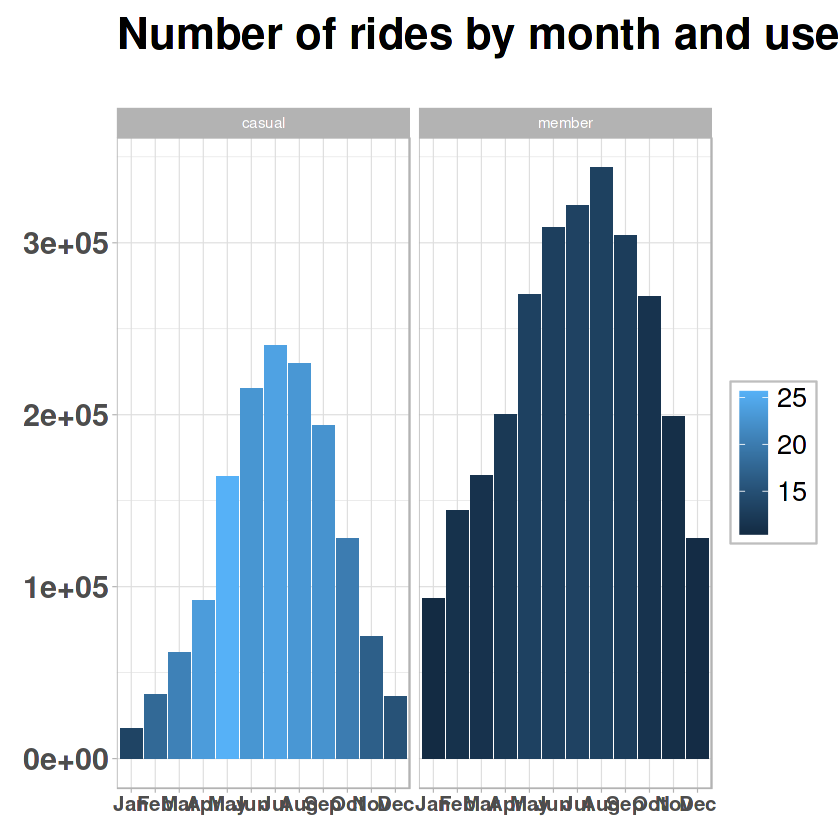

In [20]:
cyclistic_23_24_cleaned %>%
    mutate(month = month(started_at, label = TRUE)) %>%
    group_by(user_type, month) %>%
    summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>%
    ggplot(aes(x = month, y = number_of_rides, fill = average_duration)) + 
    geom_col() + facet_wrap(~user_type) + theme_light() + my_theme + 
    labs(title = "Number of rides by month and user type", x = "Month", y = "Number of rides", fill = "Number of rides")

The second visualization will show the average ride duration by month and user type.

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


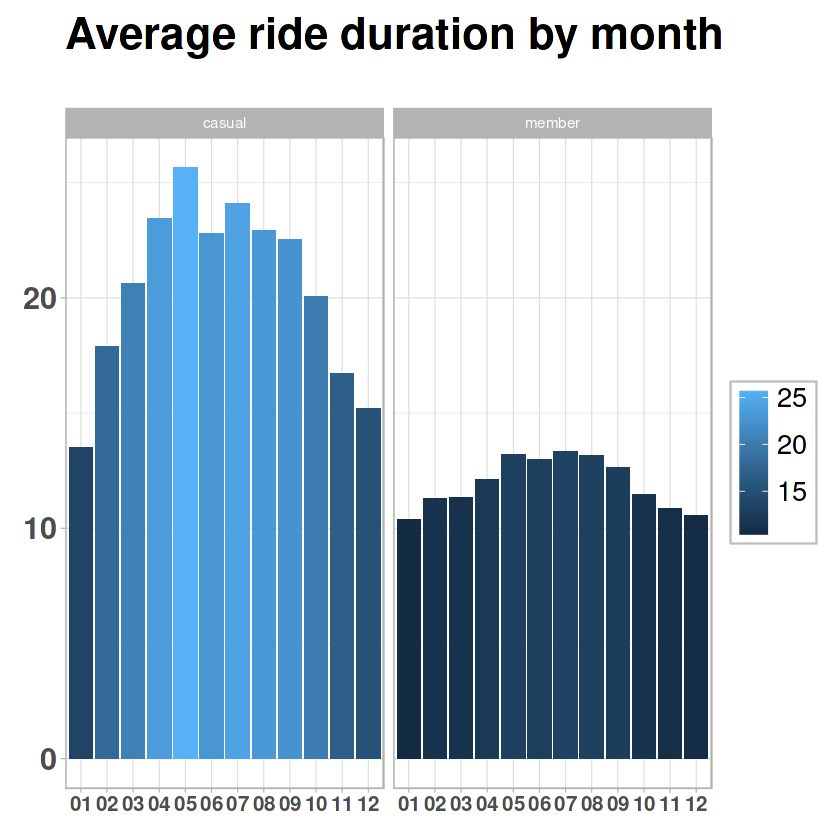

In [21]:
cyclistic_23_24_cleaned %>%
    group_by(user_type, month) %>%
    summarise(average_duration = mean(ride_length)) %>%
    ggplot(aes(x = month, y = average_duration, fill = average_duration, text = paste(month, "Average ride duration: ", average_duration))) +
    geom_col() + facet_wrap(~user_type) + theme_light() + my_theme + labs(title = "Average ride duration by month", x = "Month", y = "Average ride durations (mins)", fill = "Average ride duration (mins)")

The third visualization will indicate the number of rides by weekday and user type.

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


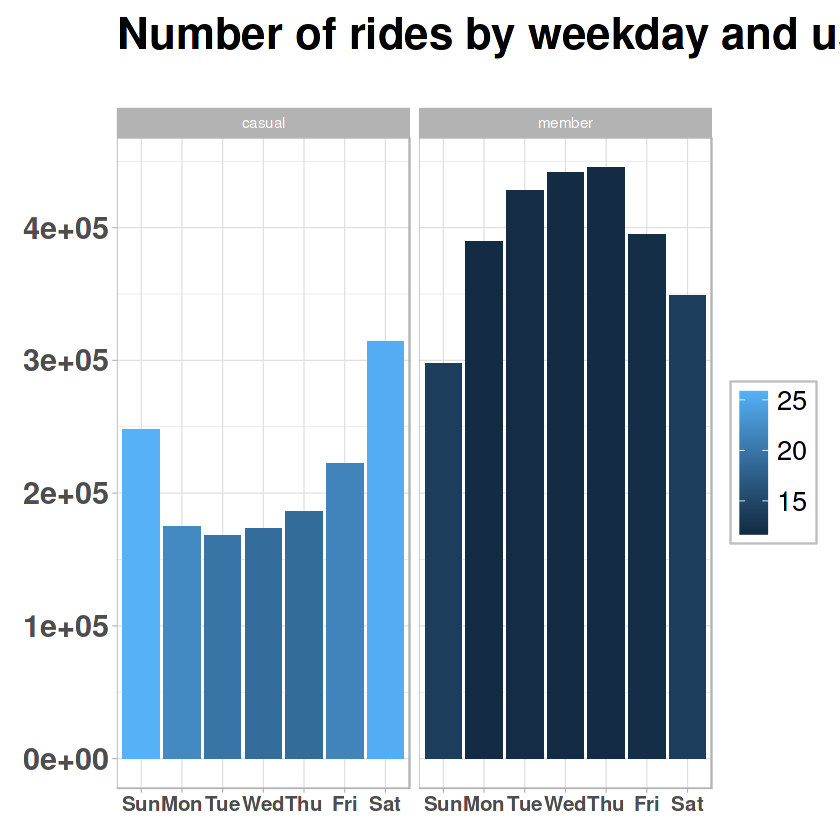

In [22]:
cyclistic_23_24_cleaned %>%
    mutate(weekday = wday(started_at, label = TRUE)) %>%
    group_by(user_type, weekday) %>%
    summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>%
    ggplot(aes(x = weekday, y = number_of_rides, fill = average_duration)) + geom_col() + 
    facet_wrap(~user_type) + theme_light() + my_theme +
    labs(title = "Number of rides by weekday and user type", x = "Day of week", y = "Number of rides", fill = "Number of rides")

The fourth visualization will indicate the average ride duration by weekday and user type.

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


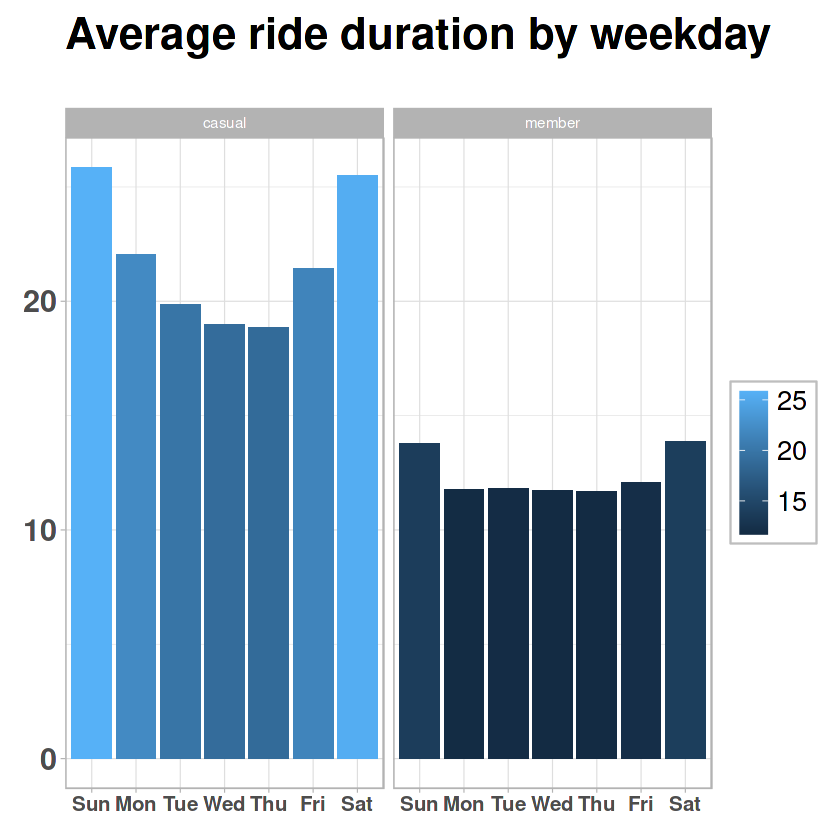

In [23]:
cyclistic_23_24_cleaned %>%
    mutate(weekday = wday(started_at, label = TRUE)) %>%
    group_by(user_type, weekday) %>%
    summarise(average_duration = mean(ride_length)) %>%
    ggplot(aes(x = weekday, y = average_duration, fill = average_duration)) + 
    geom_col() + facet_wrap(~user_type) + theme_light() + my_theme + 
    labs(title = "Average ride duration by weekday", x = "Day of week", y = "Average ride duration (mins)", fill = "Average ride duration (mins)")

The fifth visualization will reveal the top 10 most popular start stations for member users.

In [24]:
top_start_st_member <- cyclistic_23_24_cleaned %>%
    filter(!is.na(start_station_name), user_type == "member") %>%
    group_by(user_type, start_station_name) %>%
    summarise(total_rides = n(), .groups = 'drop') %>%
    top_n(10, wt = total_rides)
top_start_st_member

user_type,start_station_name,total_rides
<chr>,<chr>,<int>
member,Broadway & Barry Ave,16197
member,Clark St & Elm St,22583
member,Clinton St & Jackson Blvd,16429
member,Clinton St & Madison St,20184
member,Clinton St & Washington Blvd,25148
member,Kingsbury St & Kinzie St,24314
member,Loomis St & Lexington St,15866
member,University Ave & 57th St,17370
member,Wells St & Concord Ln,18507


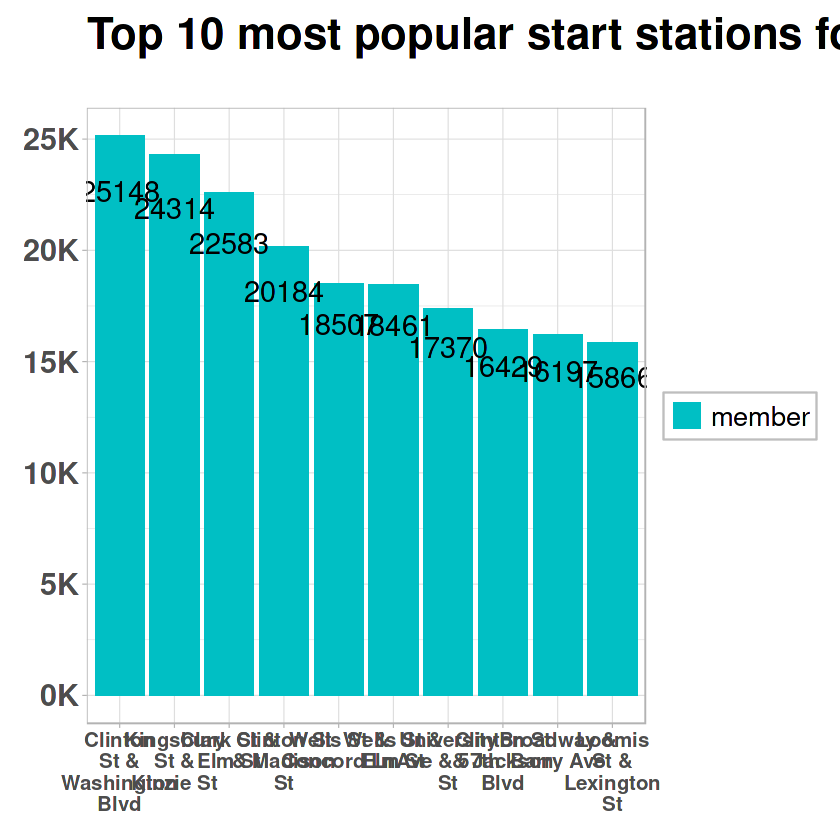

In [25]:
ggplot(top_start_st_member, aes(x = reorder(start_station_name, -total_rides), y = total_rides, fill = user_type)) + 
geom_bar(stat = "identity", position = "dodge") + labs(title = "Top 10 most popular start stations for member users", x = "Start station", y = "Number of rides") + 
theme_light() + scale_fill_manual(values = c("#00BFC4")) + my_theme + 
geom_text(aes(label = total_rides), position = position_stack(vjust = .9), color = "black", size = 6) + 
scale_x_discrete(labels = function(x) str_wrap(x, width = 10)) + scale_y_continuous(labels = scales::label_number(scale = .001, suffix = "K"), breaks = seq(0, 30000, 5000))

And the sixth visualization will reveal the top 10 most popular start stations for casual users.

In [26]:
top_start_st_casual <- cyclistic_23_24_cleaned %>%
    filter(!is.na(start_station_name), user_type == "casual") %>%
    group_by(user_type, start_station_name) %>%
    summarise(total_rides = n(), .groups = 'drop') %>%
    top_n(10, wt = total_rides)
top_start_st_casual

user_type,start_station_name,total_rides
<chr>,<chr>,<int>
casual,Adler Planetarium,11956
casual,DuSable Lake Shore Dr & Monroe St,29098
casual,DuSable Lake Shore Dr & North Blvd,18921
casual,Dusable Harbor,15044
casual,Indiana Ave & Roosevelt Rd,11026
casual,Michigan Ave & Oak St,21007
casual,Millennium Park,18306
casual,Shedd Aquarium,17547
casual,Streeter Dr & Grand Ave,43720


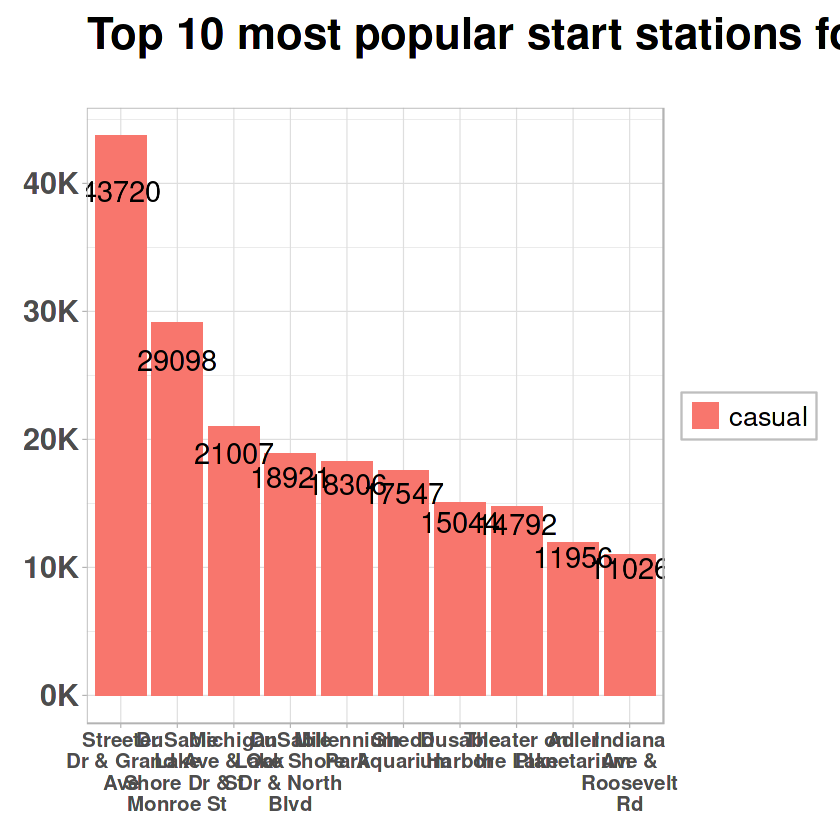

In [27]:
ggplot(top_start_st_casual, aes(x = reorder(start_station_name, -total_rides), y = total_rides, fill = user_type)) + 
geom_bar(stat = "identity", position = "dodge") + labs(title = "Top 10 most popular start stations for casual users", x = "Start station", y = "Number of rides") + 
theme_light() + my_theme + geom_text(aes(label = total_rides), position = position_stack(vjust = .9), color = "black", size = 6) + 
scale_x_discrete(labels = function(x) str_wrap(x, width = 10)) + scale_y_continuous(labels = scales::label_number(scale = .001, suffix = "K"), breaks = seq(0, 46000, 10000))

KEY TAKEAWAYS:
1. July and August are the months when both types of riders use Cyclistic the most.
2. Casual riders tend to ride more minutes per ride.
3. Members tend to ride more on wednesday and thursday while casual users ride more on the weekends.
4. For casual users the top 3 most popular start stations are: Streeter Dr & Grand Ave, DuSable Lake Shore Dr & Monroe St and Michigan Ave & Oak St.

NEXT STEPS:

The differences found on the data are primarily that members tend to ride more during weekdays to commute to work. So, to convert more casual riders into annual members, the company marketing strategy should follow the next recommendations:
- Some casual users could be using the bike as an alternative to commute to work. Show them how easy and flexible is cyclistic company for them.
- Advertise near a bus or train stations where people commute to work could be a point. Highlight how much time would they save by using the bike with no waitings.
- As summer is the maintime when riders use the bike-share company, create a marketing strategy related with the fun of riding the bike with warm weather would have an impact on users.